# Deeper CNNs and Pretrained Models

TENSORFLOW

In [1]:
import numpy as np
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import decode_predictions
import matplotlib.pyplot as plt
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [3]:
# Load image
image = load_img('dog.jpg', target_size=(224, 224))
image_np = img_to_array(image)
# The model expects a batch of images, so a forth dimension is added
# as a 'dummy' batch size of 1.
image_np = np.expand_dims(image_np, axis=0)

predictions =  [[('n02091134', 'whippet', 0.5000935), ('n02085620', 'Chihuahua', 0.05794294), ('n02111889', 'Samoyed', 0.055593137), ('n02109961', 'Eskimo_dog', 0.046852525), ('n04033995', 'quilt', 0.025647027)]]


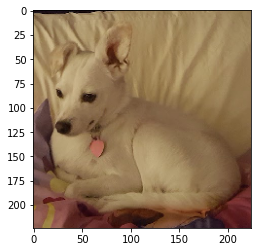

In [6]:
# Load pretrained model
model = resnet50.ResNet50(weights="imagenet")
# Standardize image
X = resnet50.preprocess_input(image_np.copy())
# The prediction
y = model.predict(X)
predicted_labels = decode_predictions(y)
print('predictions = ', predicted_labels)

# Show image
plt.imshow(np.uint8(image_np[0]))
plt.show()

PYTORCH

In [7]:
import torch 
from torchvision.models import resnet50
from torchvision import transforms 
from PIL import Image 
# Platform
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
# Load and standardize image
image = Image.open('dog.jpg')
preprocess = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
# Add the batch dimension
inputs = input_tensor.unsqueeze(0)

In [11]:
# Load pretrained model 
model = resnet50(pretrained=True)
model.eval()
# Transform model to appropriate platform 
model.to(device)
# Prediction
inputs = inputs.to(device)
with torch.no_grad():
  outputs = model(inputs)

# Convert to probabilities.
probs = torch.nn.functional.softmax(outputs[0], dim=0)

# Print class ID for top 5 predictions.
_, indices = torch.sort(probs, descending=True)
for i in range(0, 5):
    print('ImageNet class:', indices[i].item(), ', probability = %4.3f' % probs[indices[i]].item())

# Show image.
image.show()

ImageNet class: 248 , probability = 0.167
ImageNet class: 250 , probability = 0.149
ImageNet class: 797 , probability = 0.112
ImageNet class: 151 , probability = 0.111
ImageNet class: 172 , probability = 0.080
